In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the CSV file into a DataFrame
malware_df = pd.read_csv('/content/drive/MyDrive/ML_Projects/Malware_detection/Malware_dataset_two.csv')

In [4]:
malware_df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [5]:
malware_df.shape

(100000, 35)

In [6]:
print(malware_df.columns)

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')


In [7]:
# Iterate over the columns of the DataFrame
for column_name, column_type in malware_df.dtypes.items():
    print(f"Column '{column_name}': {column_type}")

Column 'hash': object
Column 'millisecond': int64
Column 'classification': object
Column 'state': int64
Column 'usage_counter': int64
Column 'prio': int64
Column 'static_prio': int64
Column 'normal_prio': int64
Column 'policy': int64
Column 'vm_pgoff': int64
Column 'vm_truncate_count': int64
Column 'task_size': int64
Column 'cached_hole_size': int64
Column 'free_area_cache': int64
Column 'mm_users': int64
Column 'map_count': int64
Column 'hiwater_rss': int64
Column 'total_vm': int64
Column 'shared_vm': int64
Column 'exec_vm': int64
Column 'reserved_vm': int64
Column 'nr_ptes': int64
Column 'end_data': int64
Column 'last_interval': int64
Column 'nvcsw': int64
Column 'nivcsw': int64
Column 'min_flt': int64
Column 'maj_flt': int64
Column 'fs_excl_counter': int64
Column 'lock': int64
Column 'utime': int64
Column 'stime': int64
Column 'gtime': int64
Column 'cgtime': int64
Column 'signal_nvcsw': int64


In [8]:
#Check for null values in any of the features
null_values = malware_df.isnull().sum()
print(null_values)

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64


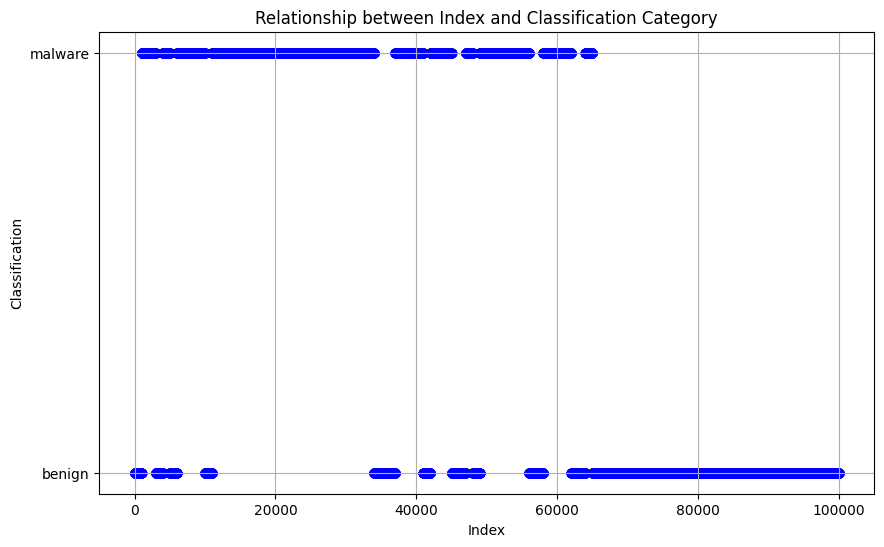

In [9]:
# Create scatter plot to see relationship between index and classification
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(malware_df.index, malware_df['classification'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Classification')
plt.title('Relationship between Index and Classification Category')
plt.yticks([0, 1], ['benign', 'malware'])  # Set y-axis ticks labels
plt.grid(True)
plt.show()

In [10]:
def plot_distribution(df):
    # Get the list of columns except 'hash'
    columns_to_plot = [col for col in df.columns if col != 'hash']

    for column in columns_to_plot:
        # Check if the column contains more than 10 distinct values and if yes
        # plot a line chart

        if len(df[column].unique()) > 10:
            # For continuous data, plot line chart
            value_counts = df[column].value_counts(normalize=True).sort_index() * 100
            plt.figure(figsize=(8, 6))
            plt.plot(value_counts.index, value_counts.values, marker='o', color='skyblue')
            plt.title(f'Distribution of Column: {column}')
            plt.xlabel('Value')
            plt.ylabel('Percentage (%)')
            plt.grid(axis='y')
            plt.show()
        else:
            # For discrete data, plot bar chart
            percentage_values = df[column].value_counts(normalize=True) * 100
            plt.figure(figsize=(8, 6))
            percentage_values.plot(kind='bar', color='skyblue')
            plt.title(f'Percentage of DataFrame with Different Values in Column: {column}')
            plt.xlabel('Unique Values')
            plt.ylabel('Percentage (%)')
            plt.xticks(rotation=0)
            plt.grid(axis='y')
            plt.show()

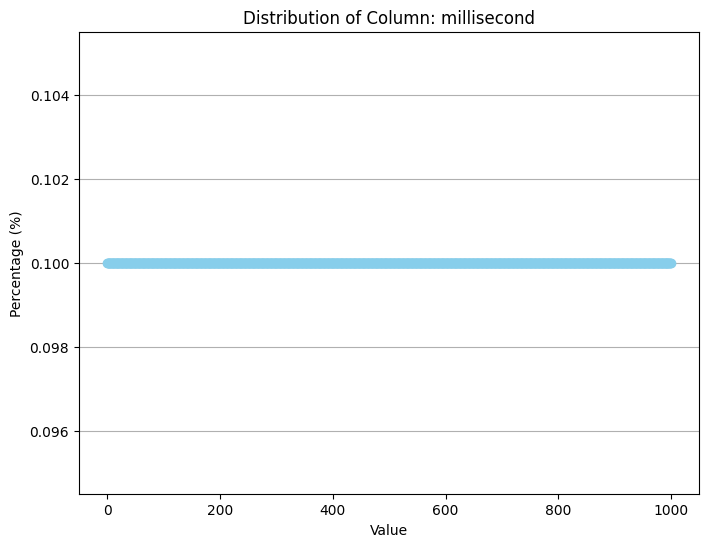

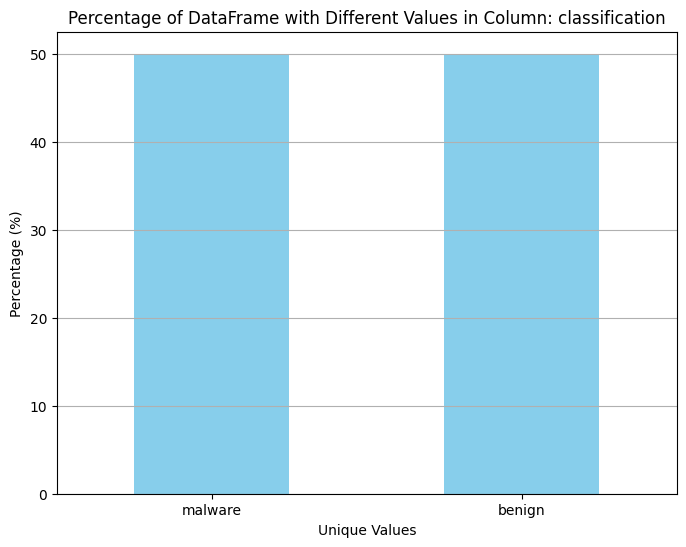

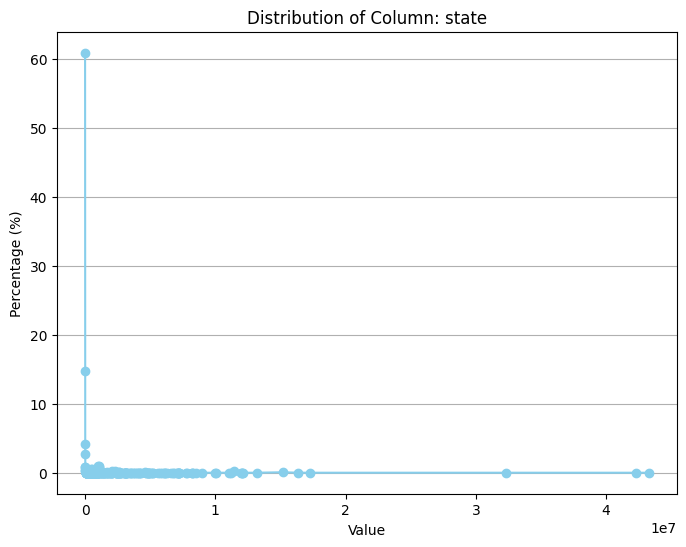

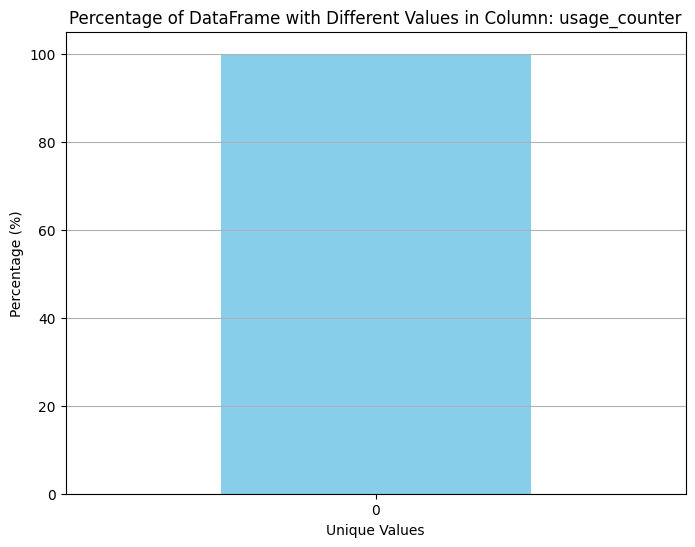

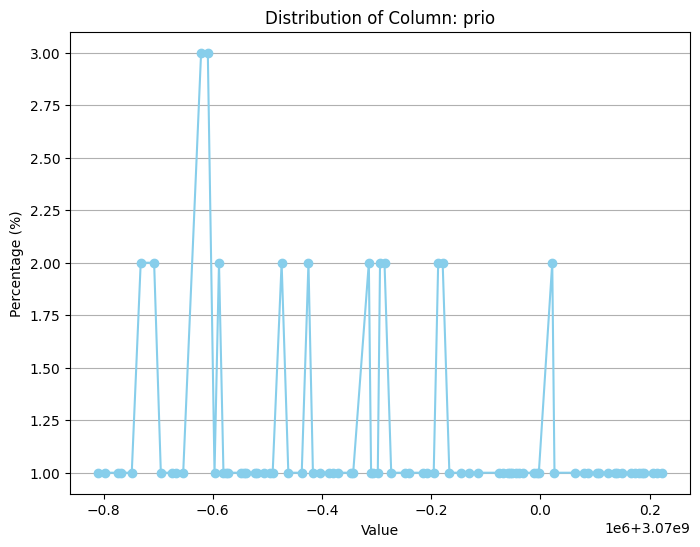

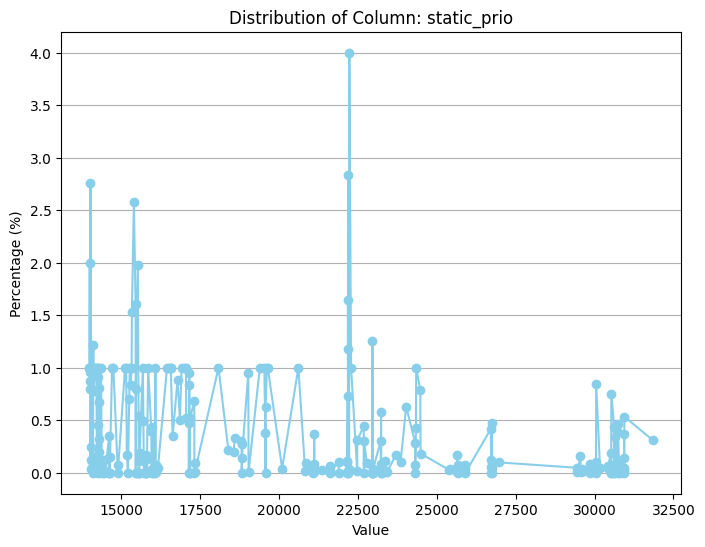

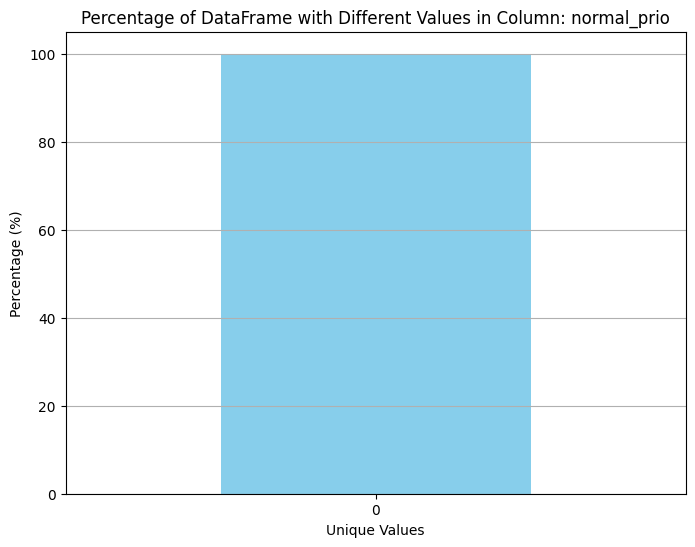

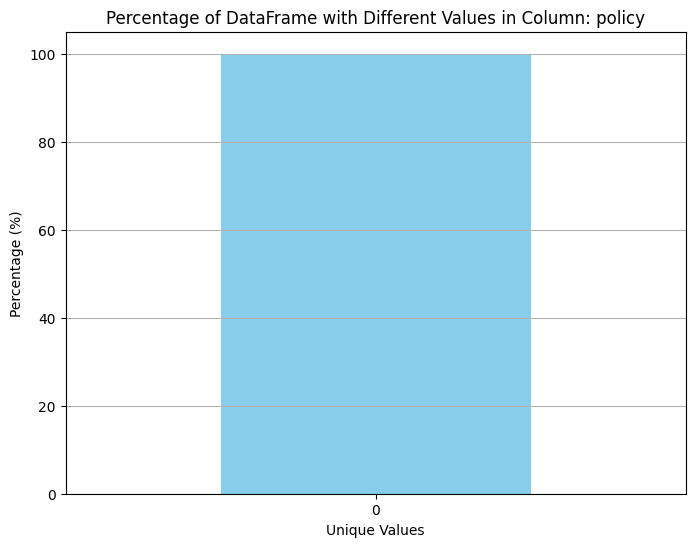

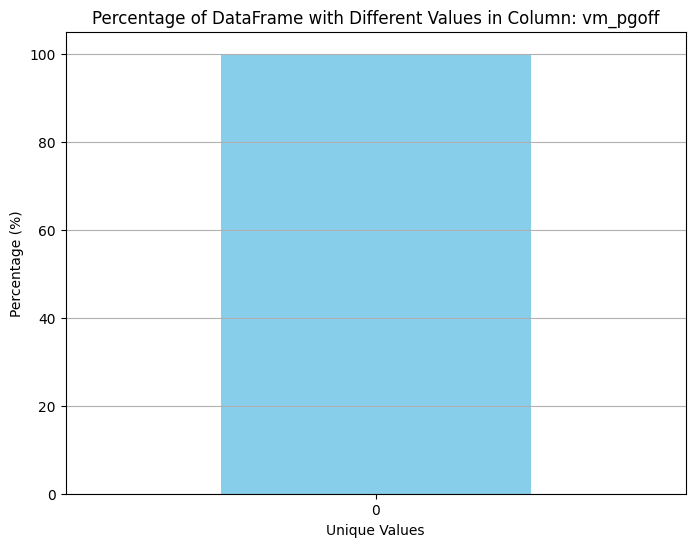

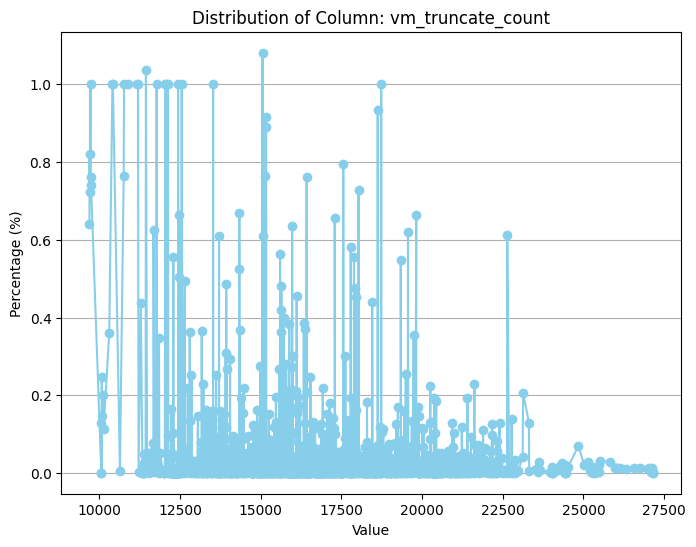

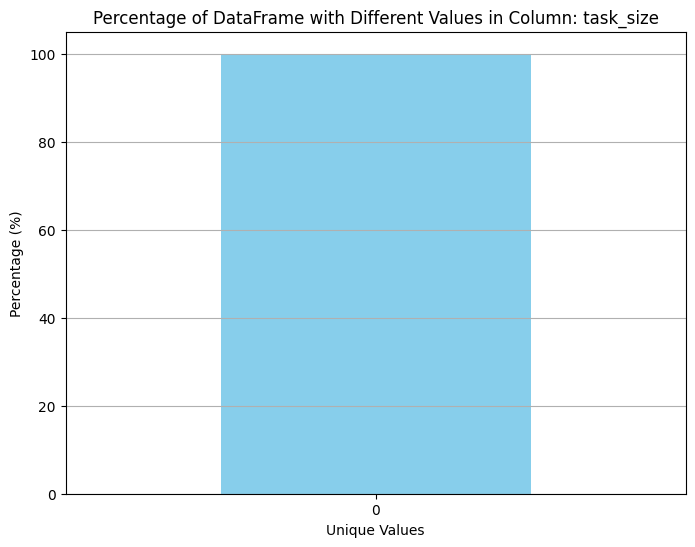

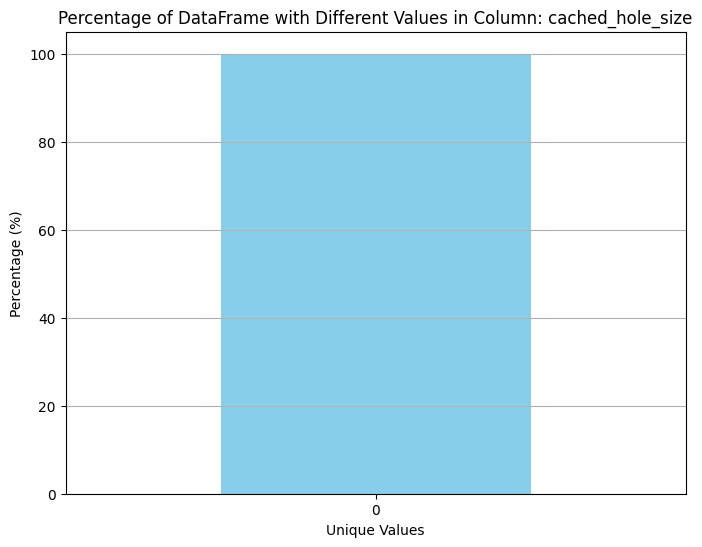

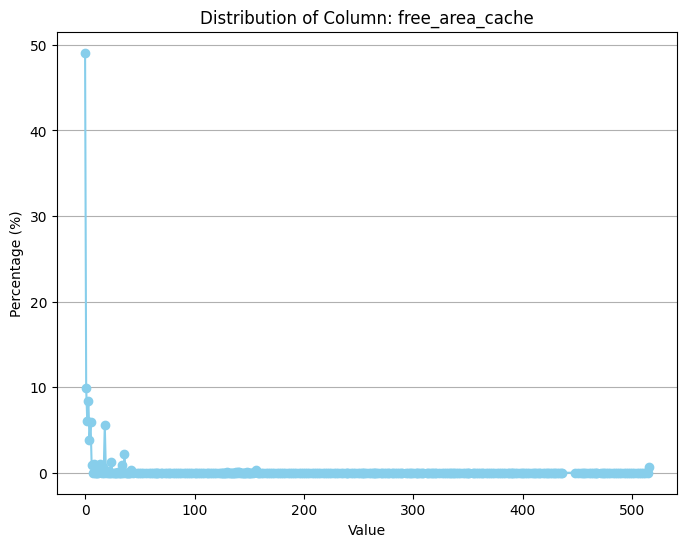

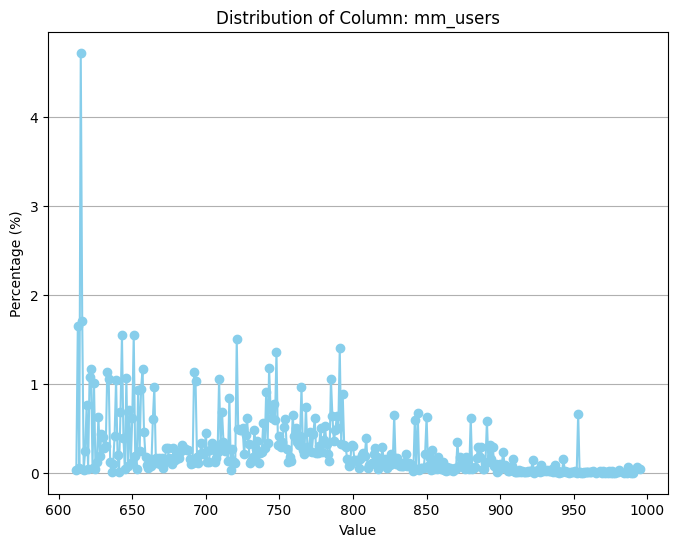

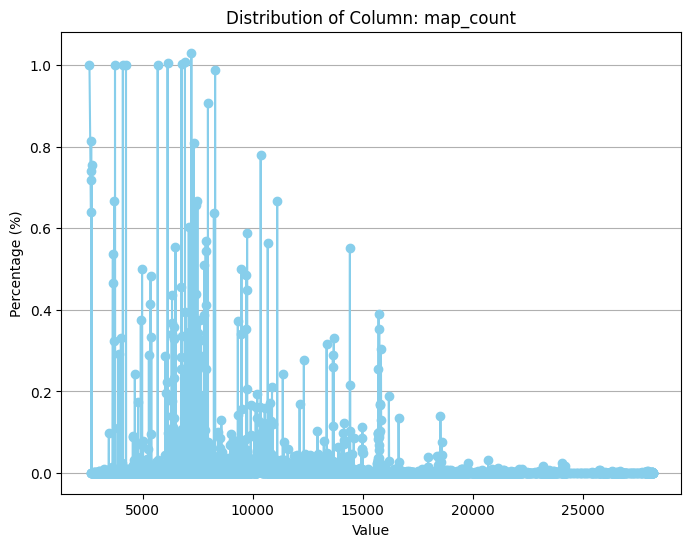

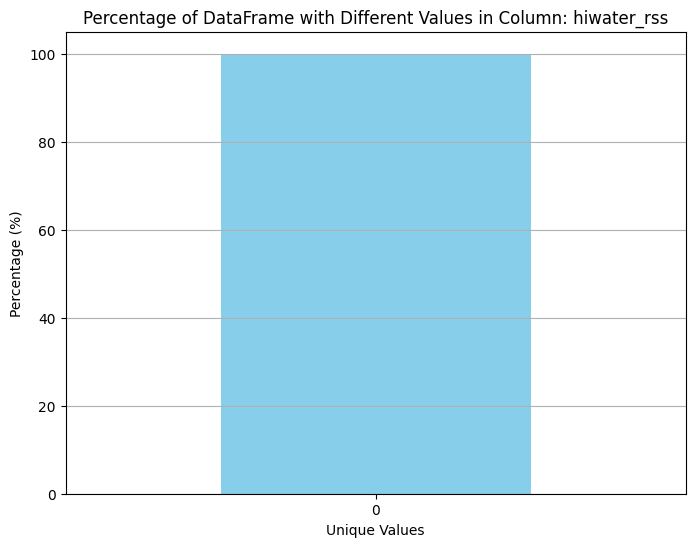

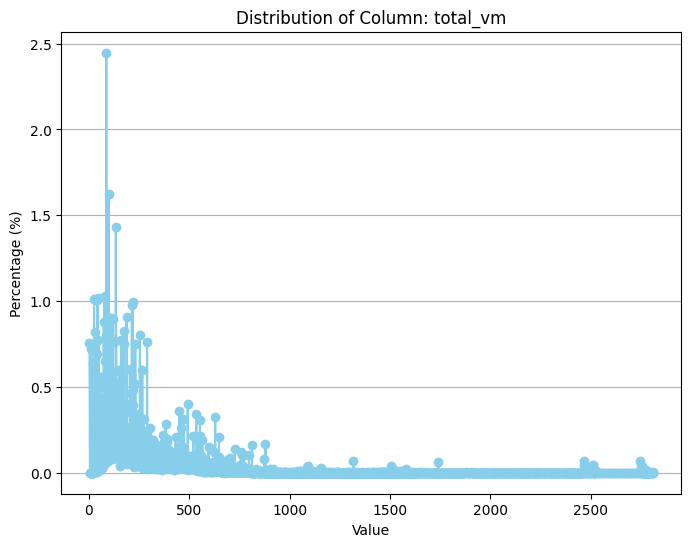

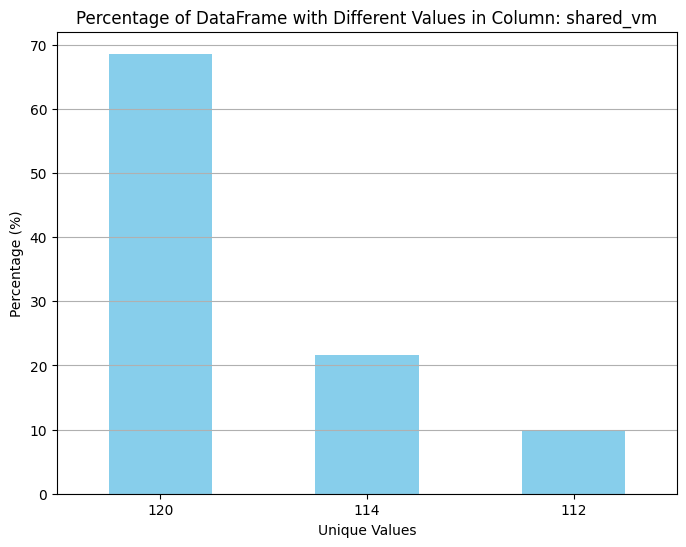

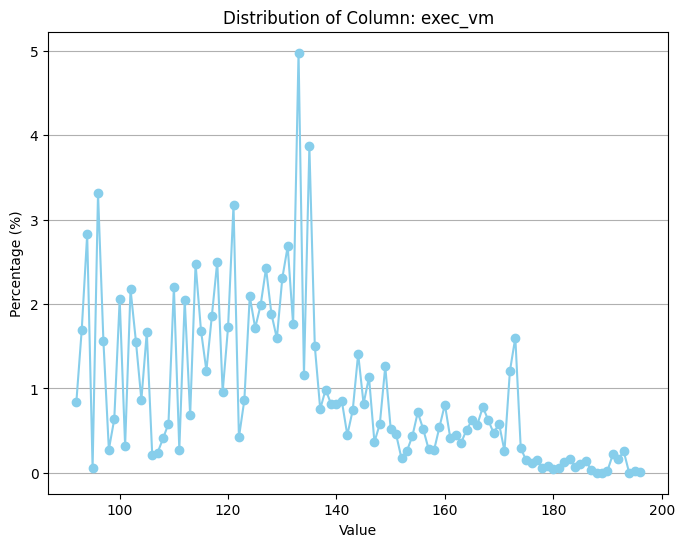

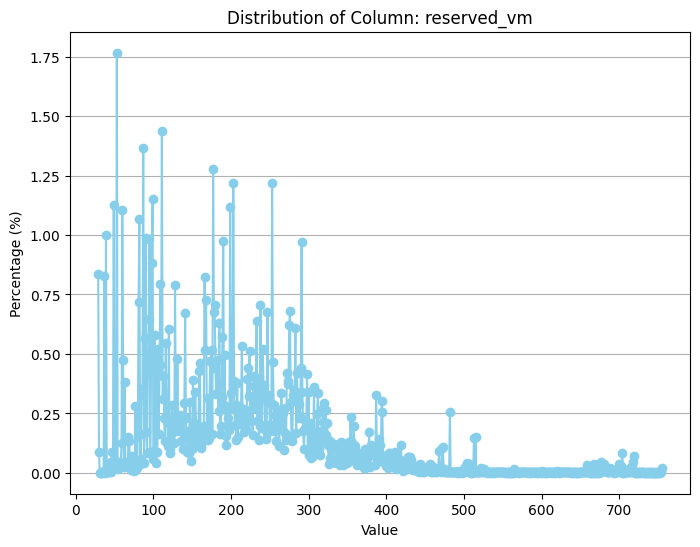

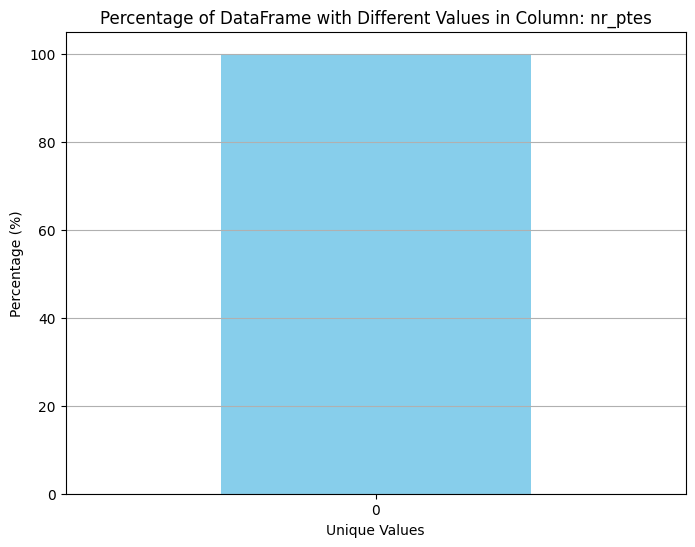

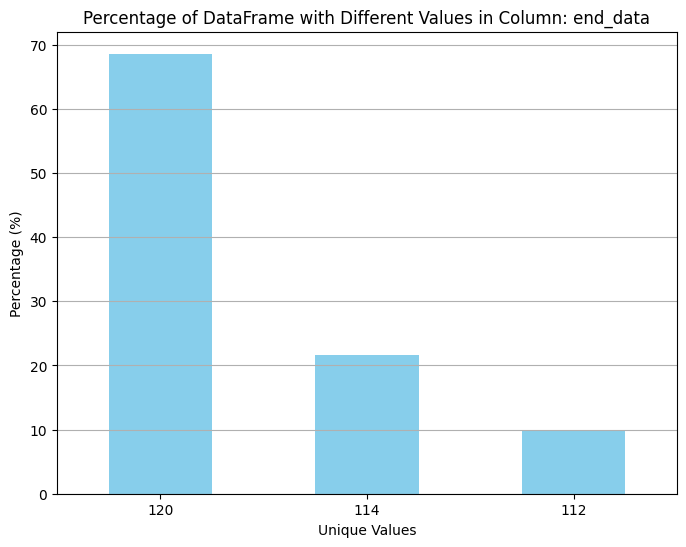

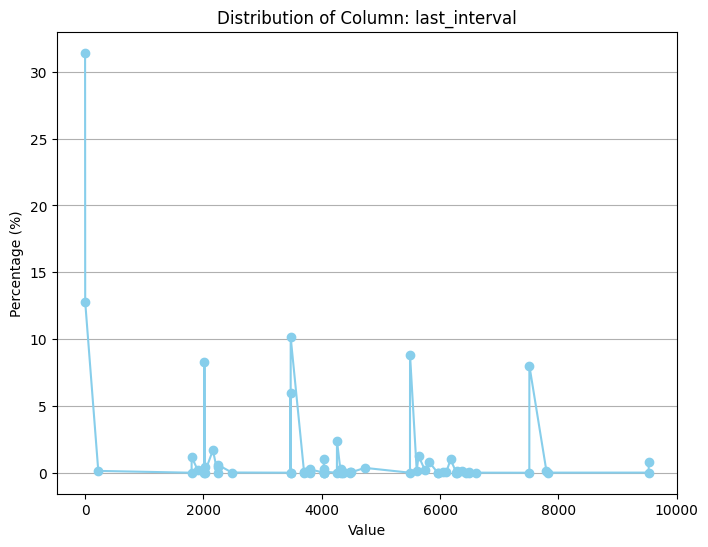

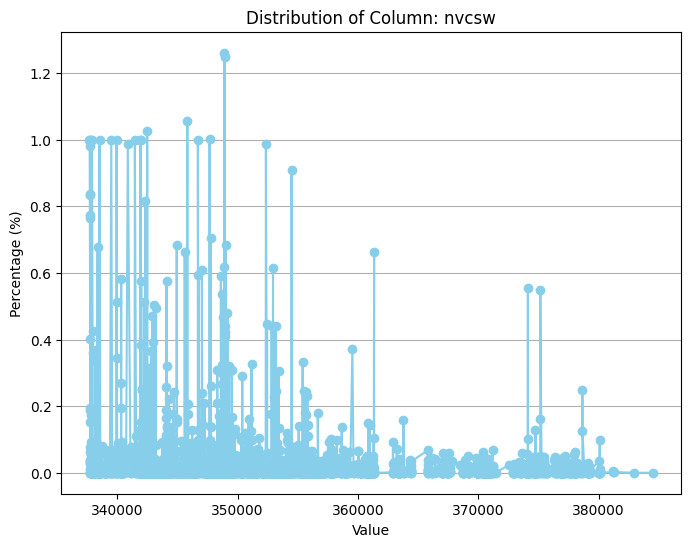

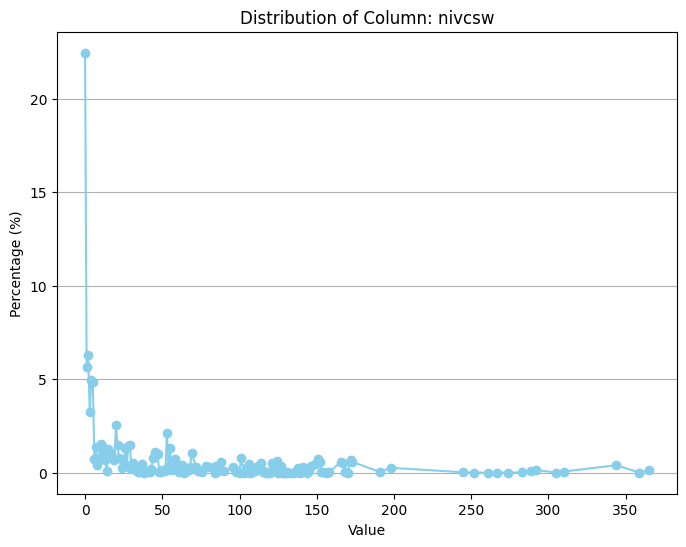

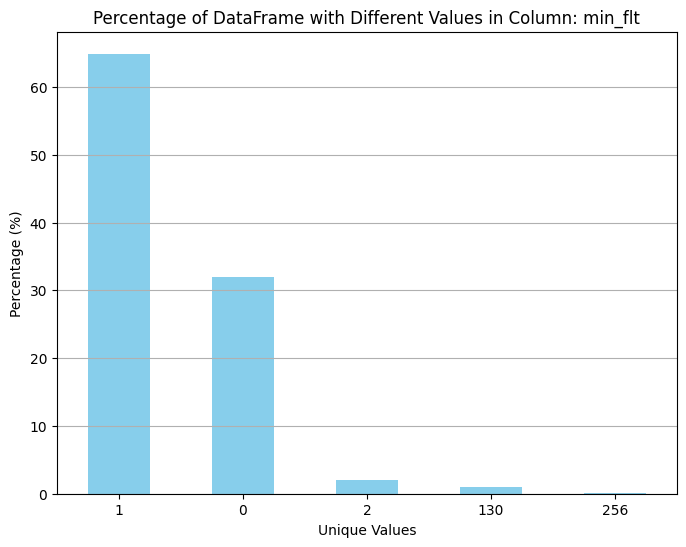

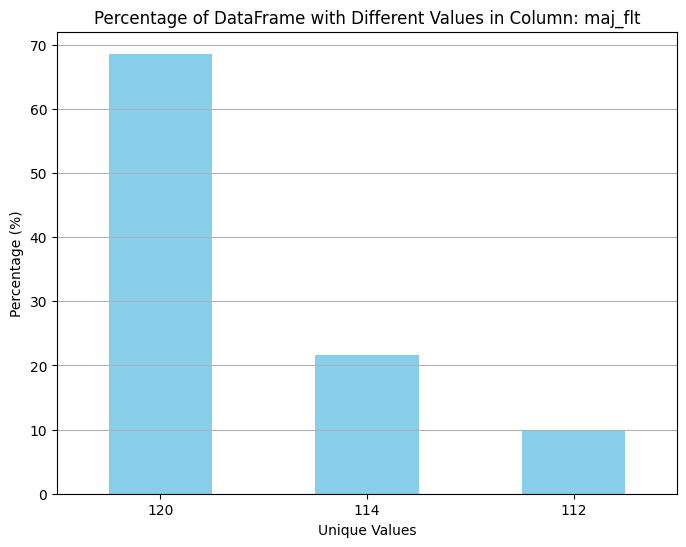

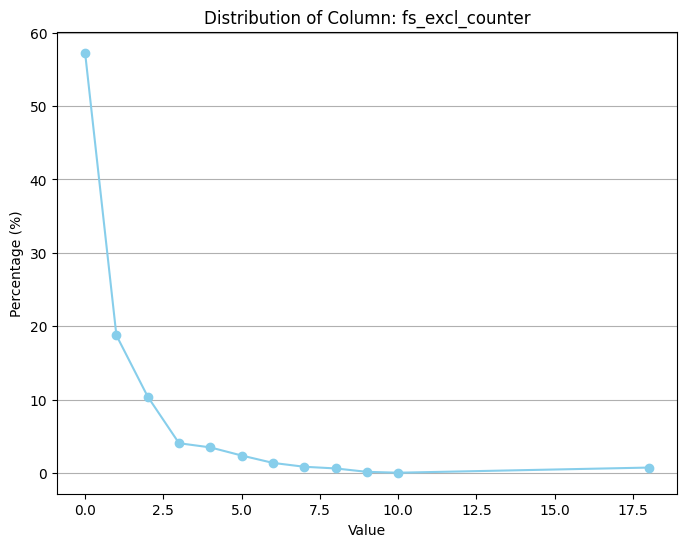

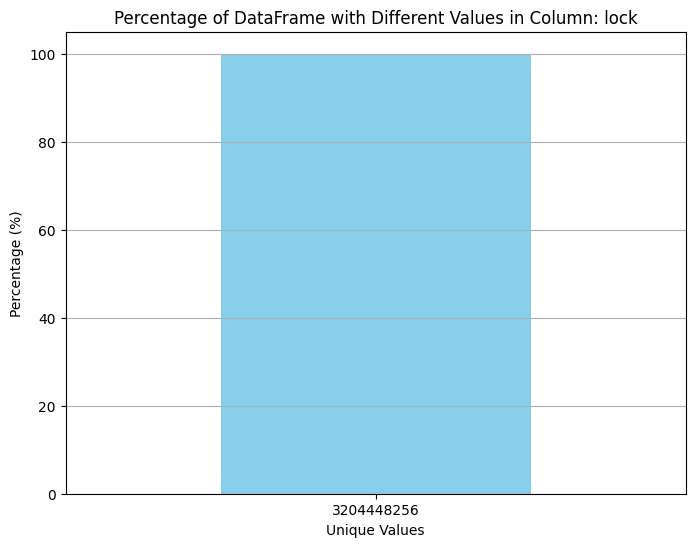

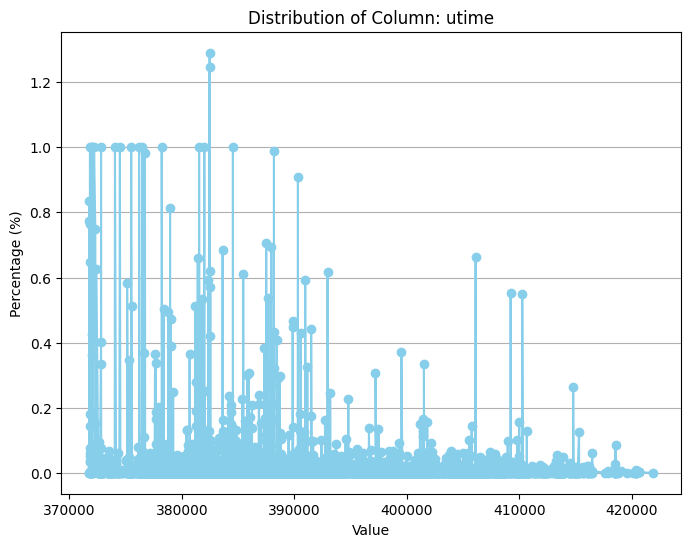

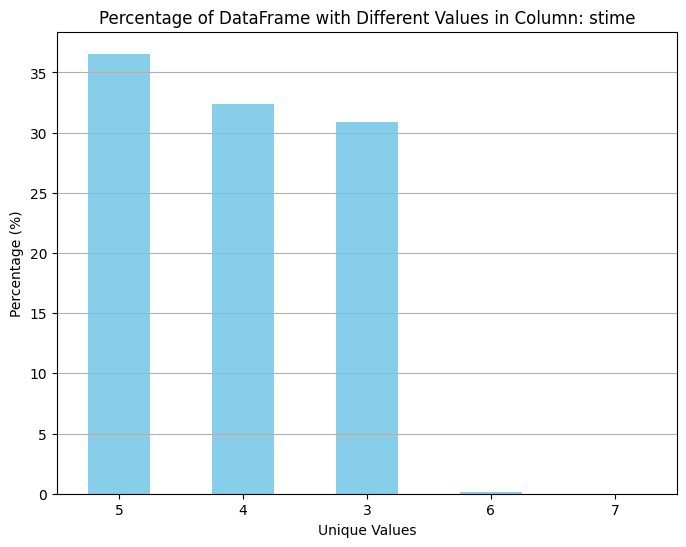

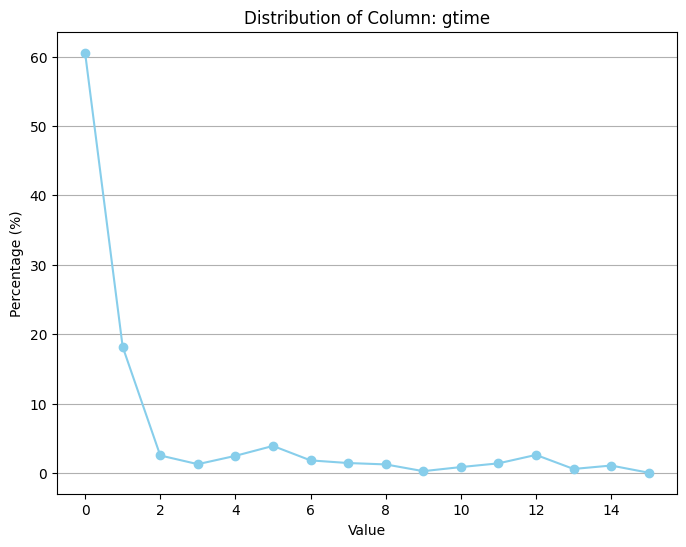

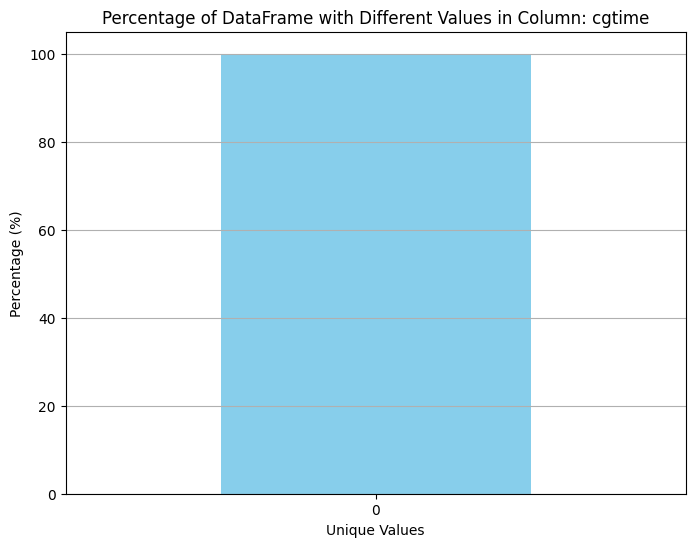

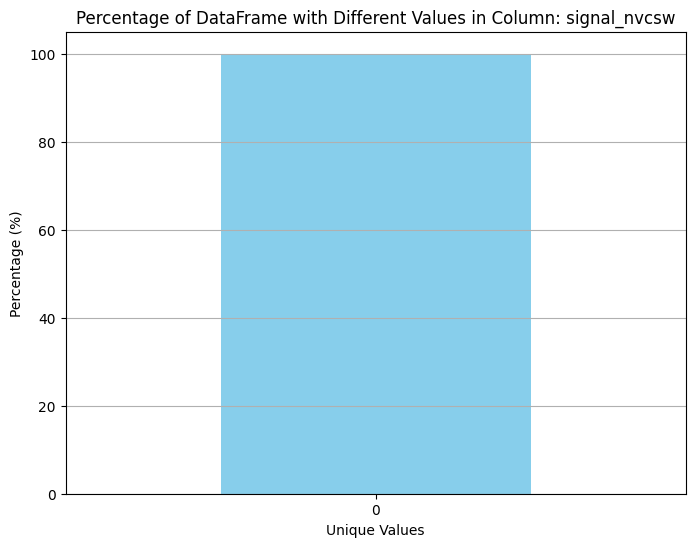

In [13]:
plot_distribution(malware_df)

In [20]:
# Find columns with only one unique value
columns_with_one_unique_value = malware_df.columns[malware_df.nunique() == 1]

# Print the columns
print("Columns with only one unique value:")
print(columns_with_one_unique_value)

Columns with only one unique value:
Index(['usage_counter', 'normal_prio', 'policy', 'vm_pgoff', 'task_size',
       'cached_hole_size', 'hiwater_rss', 'nr_ptes', 'lock', 'cgtime',
       'signal_nvcsw'],
      dtype='object')


In [17]:
# Replace 'benign' with 0 and 'malware' with 1 in the 'classification' column
malware_df['classification'] = malware_df['classification'].replace({'benign': 0, 'malware': 1})

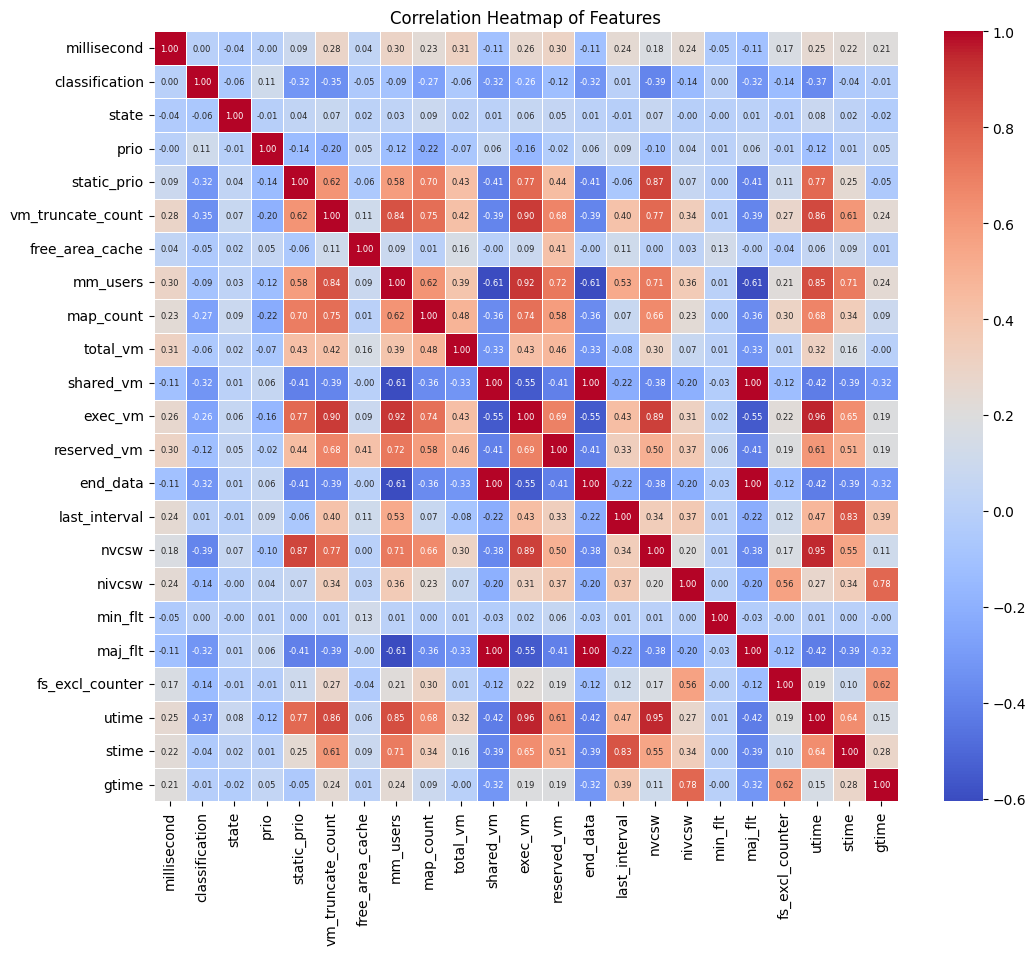

In [22]:
# Compute the correlation matrix
correlation_matrix = malware_df.drop(['hash','usage_counter', 'normal_prio', 'policy', 'vm_pgoff', 'task_size',
       'cached_hole_size', 'hiwater_rss', 'nr_ptes', 'lock', 'cgtime',
       'signal_nvcsw'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title('Correlation Heatmap of Features')
plt.show()

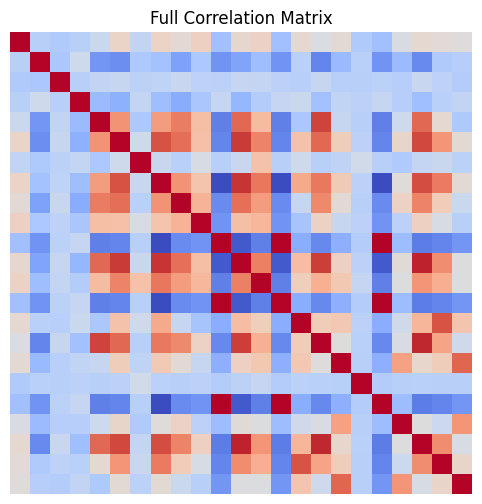

In [23]:
# Plot smaller version of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.title('Full Correlation Matrix')
plt.axis('off')
plt.show()

# Tree classifier

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [27]:
len(malware_df.columns)

35

In [28]:
# Shuffle the DataFrame
malware_df_shuffled = shuffle(malware_df, random_state=42)

# Separate features (X) and target variable (y)
X = malware_df_shuffled.drop(columns=['classification','hash','usage_counter', 'normal_prio', 'policy', 'vm_pgoff', 'task_size',
       'cached_hole_size', 'hiwater_rss', 'nr_ptes', 'lock', 'cgtime','signal_nvcsw'])
y = malware_df_shuffled['classification']

# Split the data into training and testing sets, 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # You can adjust the test_size and random_state as needed

# Print the shapes of the training and testing sets
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes of training and testing sets:
X_train: (80000, 22)
X_test: (20000, 22)
y_train: (80000,)
y_test: (20000,)


In [30]:
extratrees = ExtraTreesClassifier().fit(X_train, y_train)
select = SelectFromModel(extratrees, prefit=True)
X_train = select.transform(X_train)

# Apply the same feature selection on test data
X_test = select.transform(X_test)

print(X_train.shape, X_test.shape)

(80000, 8) (20000, 8)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [32]:
features = X_train.shape[1]
importances = extratrees.feature_importances_
indices = np.argsort(importances)[::-1]

for feature in range(features):
  print("%d"%(feature+1), malware_df.columns[2+indices[feature]], importances[indices[feature]])

1 prio 0.15679272261718374
2 hiwater_rss 0.10158131353778677
3 nr_ptes 0.08600503805927151
4 static_prio 0.06658180644802546
5 cached_hole_size 0.06571372756289227
6 exec_vm 0.05903103501284215
7 mm_users 0.057185533614183236
8 task_size 0.04783801985337163


In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=50)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [34]:
# Evaluate the accuracy of the trained model on the test data using the score method
accuracy = classifier_rf.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 1.0


In [35]:
# Get the predicted labels for the test data
y_pred = classifier_rf.predict(X_test)

# Confusion Matrix

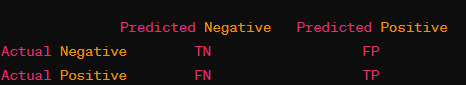

- TN -> Actual '0', Predicted '0' . Is 'Benign' and Predicted 'Benign'
- FN -> Actual '1', Predicted '0'. Is 'Malware' and Predited 'Benign'
- FP -> Actual '0', Predicted '1'. Is 'Benign' and Predicted 'Malware'
- TP -> Actual '1', Predicted '1'. Is 'Malware' and Predicted 'Benign'

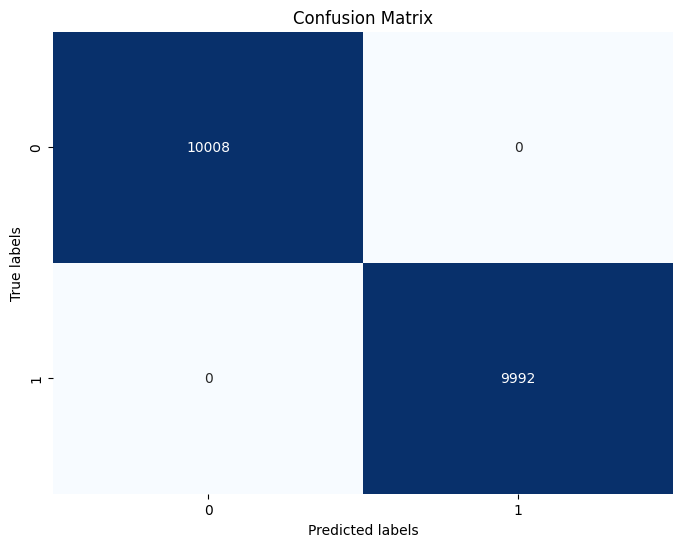

In [36]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()